<h1>Loan Approval Prediction</h1>

<h3>Problem Statement:</h3> 
<p>This is a standard classification problem.A classification problem where we have to predict whether a loan would be approved or not based on the features provided.</p>

<h3>Data (Kaggle) :</h3>
<a>https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset </a>



















In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading dataset
df = pd.read_csv("loandata.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Displaying features and labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Preprocessing the Data

In [6]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#filling the missing values for numrical variables using median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [8]:
#filling the missing values for categorical variables using mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [9]:
#all the missing values are filled
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

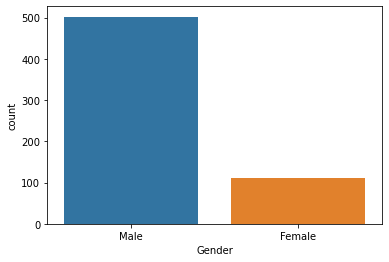

In [10]:
#visualizing categorical attributes
sns.countplot(df['Gender'])


<AxesSubplot:xlabel='Married', ylabel='count'>

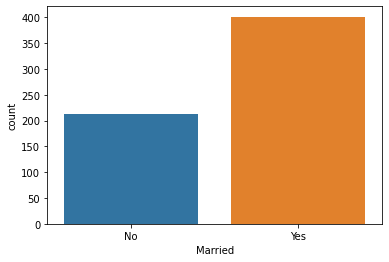

In [11]:
sns.countplot(df['Married'])


<AxesSubplot:xlabel='Dependents', ylabel='count'>

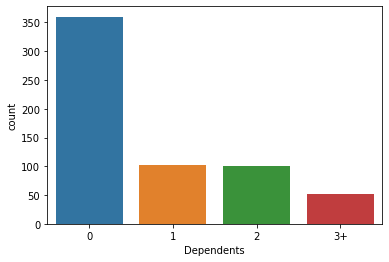

In [12]:
sns.countplot(df['Dependents'])


<AxesSubplot:xlabel='Education', ylabel='count'>

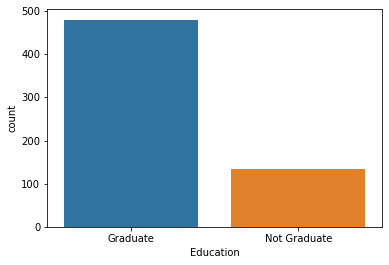

In [13]:
sns.countplot(df['Education'])


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

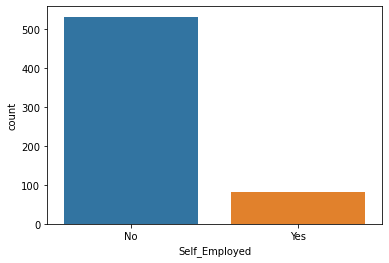

In [14]:
sns.countplot(df['Self_Employed'])


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

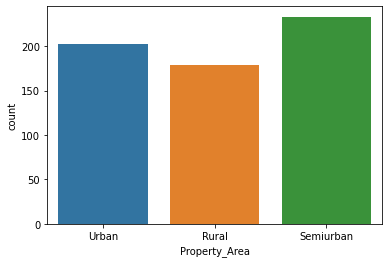

In [15]:
sns.countplot(df['Property_Area'])


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

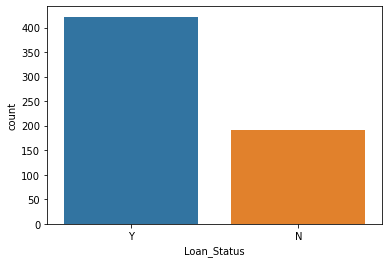

In [16]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome'>

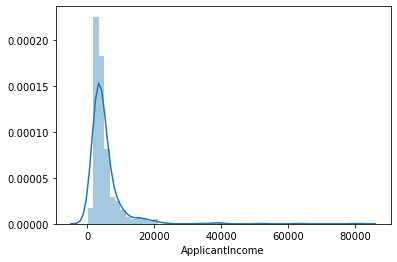

In [17]:
#visualizing numerical attributes
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

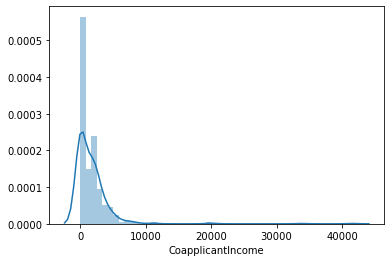

In [18]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

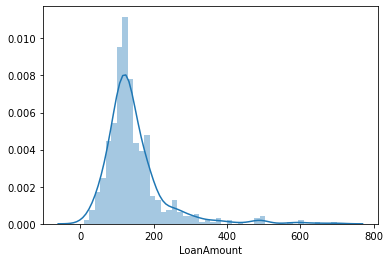

In [19]:
sns.distplot(df["LoanAmount"])


<AxesSubplot:xlabel='Loan_Amount_Term'>

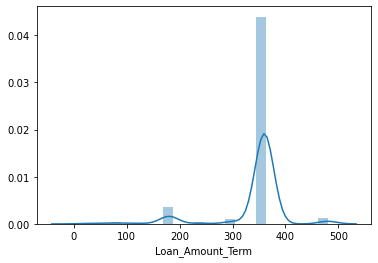

In [20]:
sns.distplot(df['Loan_Amount_Term'])


<AxesSubplot:xlabel='Credit_History'>

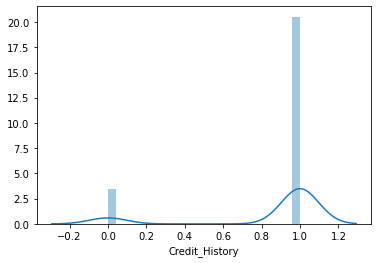

In [21]:
sns.distplot(df['Credit_History'])


## Creating of new attributes

In [22]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='ApplicantIncomeLog'>

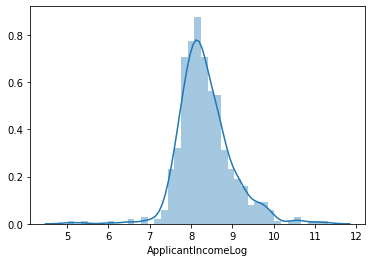

In [23]:
# applying log transformation on numerical variables
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog'>

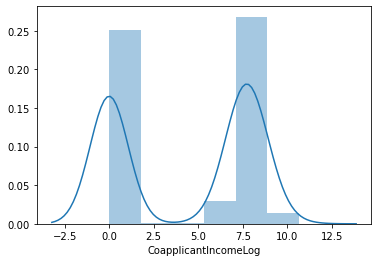

In [24]:
# adding 1 inside log as this variable contains zero value
df['CoapplicantIncomeLog'] = np.log(1+df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncomeLog'])

<AxesSubplot:xlabel='LoanAmountLog'>

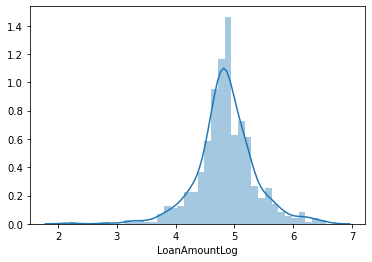

In [25]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log'>

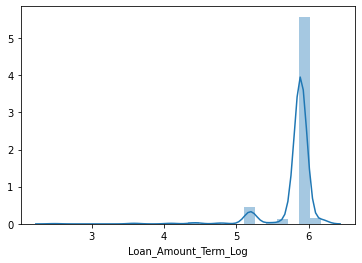

In [26]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log'>

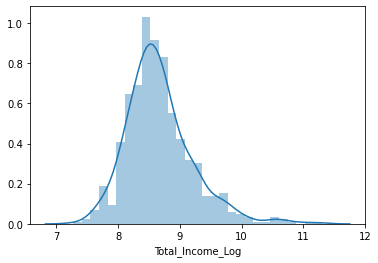

In [27]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

## Correlation Matrix

<AxesSubplot:>

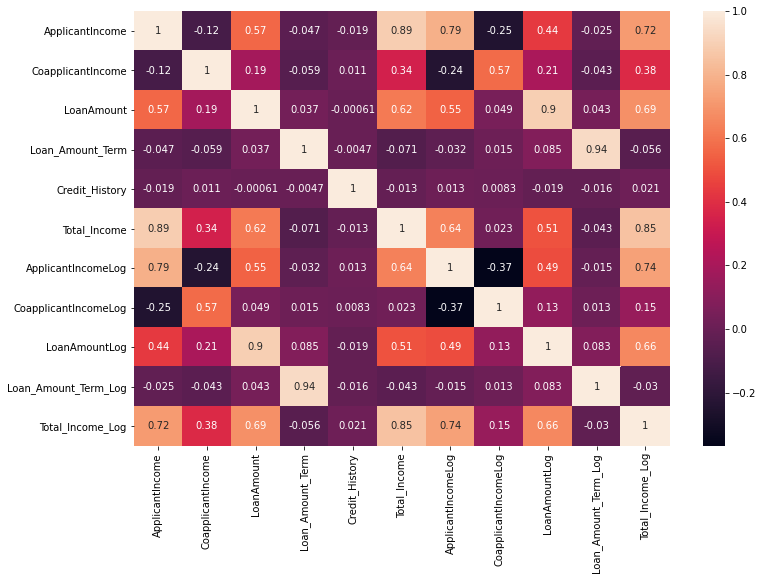

In [28]:
#plotting heatmap
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)

In [29]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.852030,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


## Data Cleaning

In [30]:
#removing unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.852030,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


## Label Encoding

In [31]:

cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.852030,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


## Splitting of Training and Testing Data

In [33]:
#Train-Test Splitting
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


## Training Model

In [34]:
# classify function
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - used for better validation of model
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [35]:

model = LogisticRegression()
classify(model, x, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [36]:
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is 72.72727272727273
Cross validation is 71.6593362654938


In [37]:
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is 77.92207792207793
Cross validation is 78.3406637345062


In [38]:
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy is 73.37662337662337
Cross validation is 76.22550979608157


In [39]:
#choosing randomforestclassifier model as it gives highest accuracy
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)


Accuracy is 75.97402597402598
Cross validation is 80.45715047314408


## Confusion Matrix


In [40]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
#displaying confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 25],
       [ 5, 75]], dtype=int64)

<AxesSubplot:>

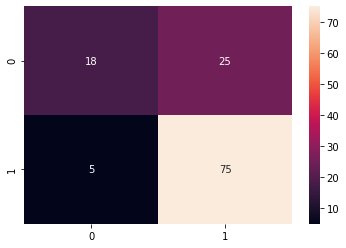

In [42]:
sns.heatmap(cm, annot=True)
